# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Data Preparation

## Train

In [2]:
# read csv file

df = pd.read_csv('dataset/aug_train.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [3]:
df.shape

(19158, 14)

In [4]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [6]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [7]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [8]:
df.nunique()

enrollee_id               19158
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   22
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
target                        2
dtype: int64

In [9]:
cats = [c for c in df.columns if df[c].dtypes == "object"]
cats

['city',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

In [10]:
df[cats].describe()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [11]:
nums = [c for c in df.columns if np.issubdtype(df[c].dtype, np.number)]
nums

['enrollee_id', 'city_development_index', 'training_hours', 'target']

In [12]:
df[nums].describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [13]:
"""
for column in cats:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df, palette='Set2')
    plt.title(f'Frequency Distribution of {column}')
    plt.show()
    
"""

"\nfor column in cats:\n    plt.figure(figsize=(8, 6))\n    sns.countplot(x=column, data=df, palette='Set2')\n    plt.title(f'Frequency Distribution of {column}')\n    plt.show()\n    \n"

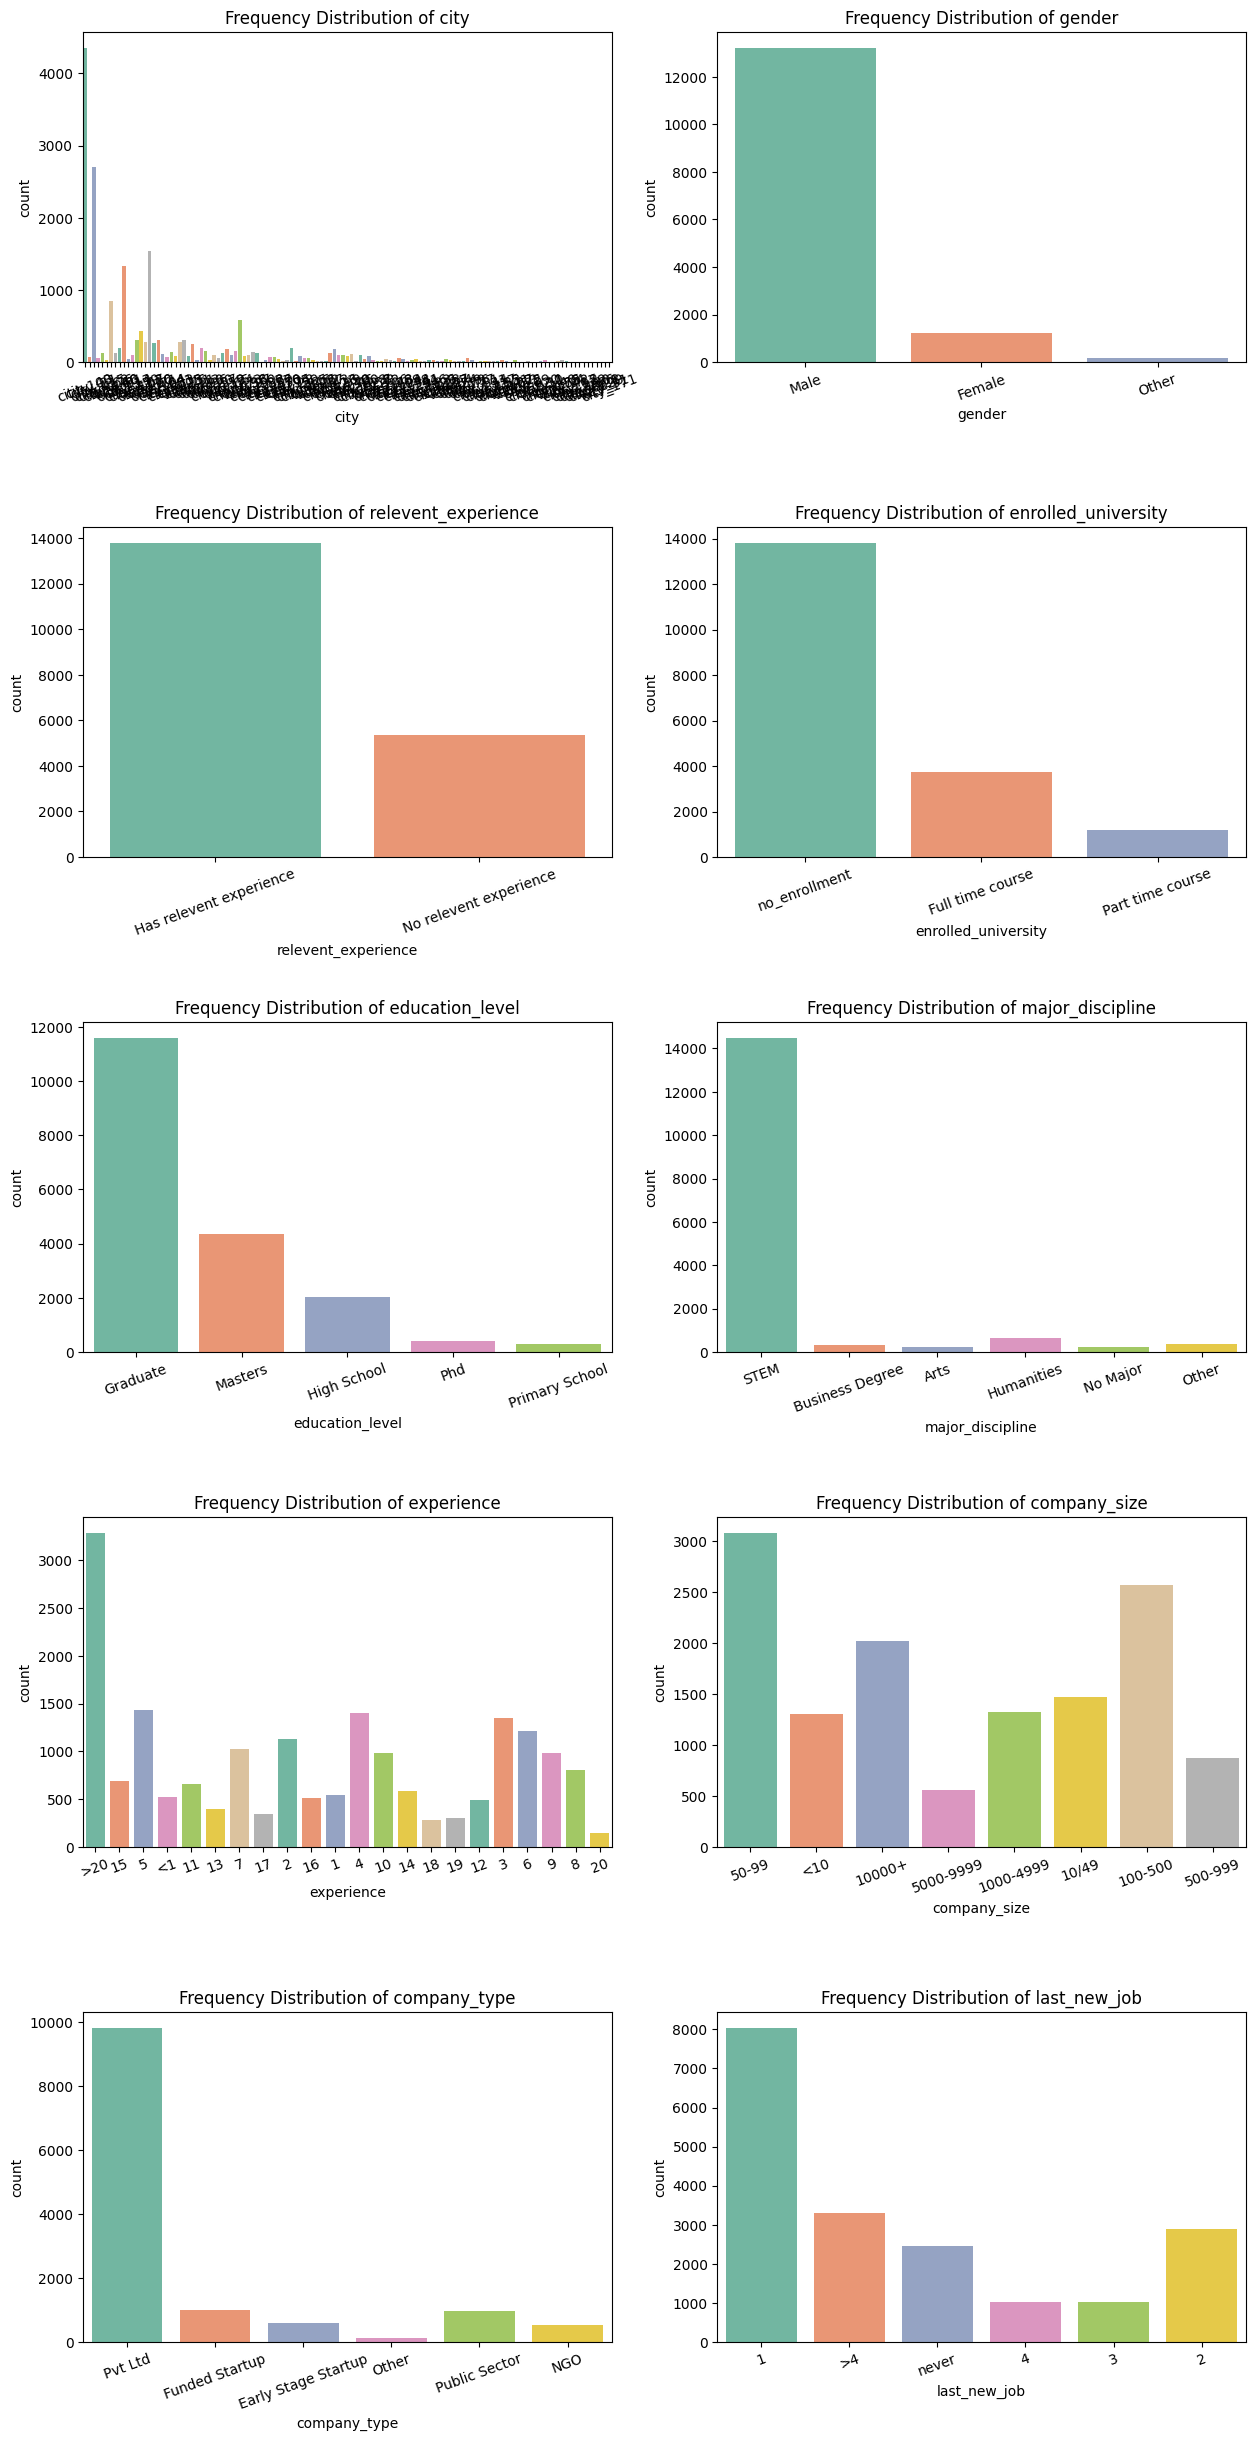

In [14]:
# Set the number of columns and rows
num_cols = 2
num_rows = (len(cats) + num_cols - 1) // num_cols

# subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 30))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing

# Flatten the axes if there is only one row
axes = axes.flatten() if num_rows > 1 else [axes]

# Loop through each categorical columns
for i, (column, ax) in enumerate(zip(cats, axes)):
    sns.countplot(x=column, data=df, palette='Set2', ax=ax)
    ax.set_title(f'Frequency Distribution of {column}')
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=20)

plt.show()

<Figure size 800x600 with 0 Axes>

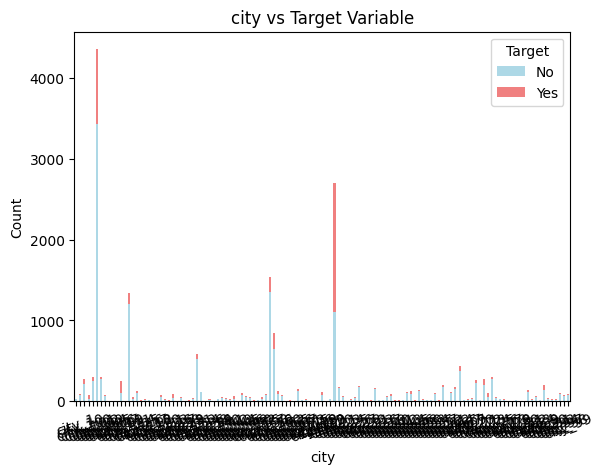

<Figure size 800x600 with 0 Axes>

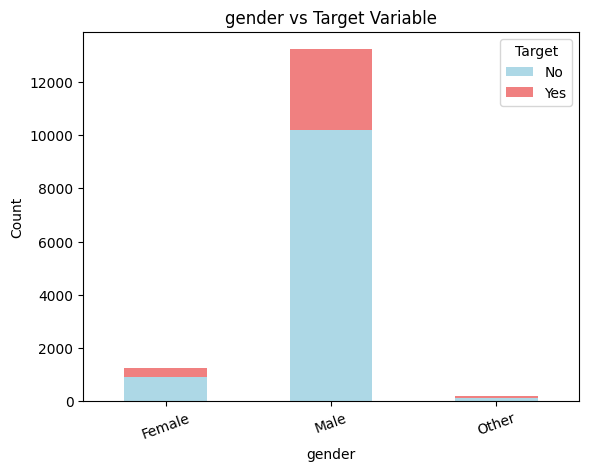

<Figure size 800x600 with 0 Axes>

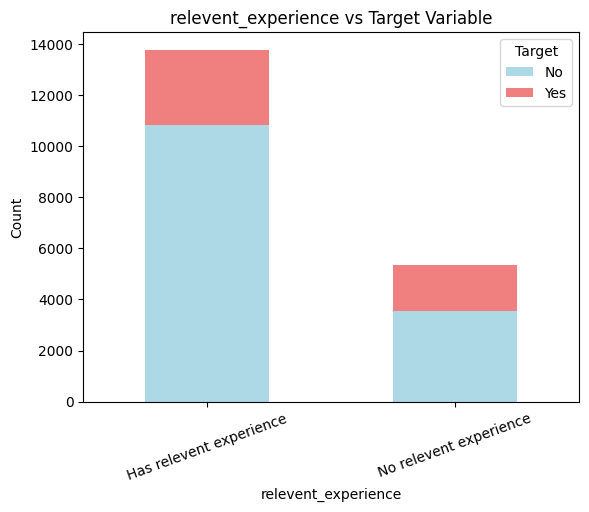

<Figure size 800x600 with 0 Axes>

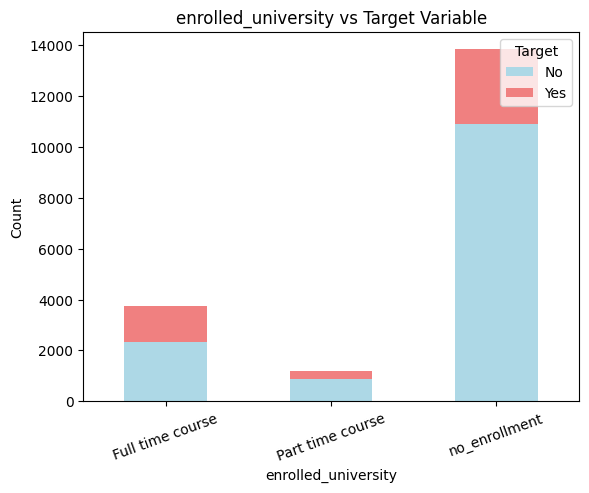

<Figure size 800x600 with 0 Axes>

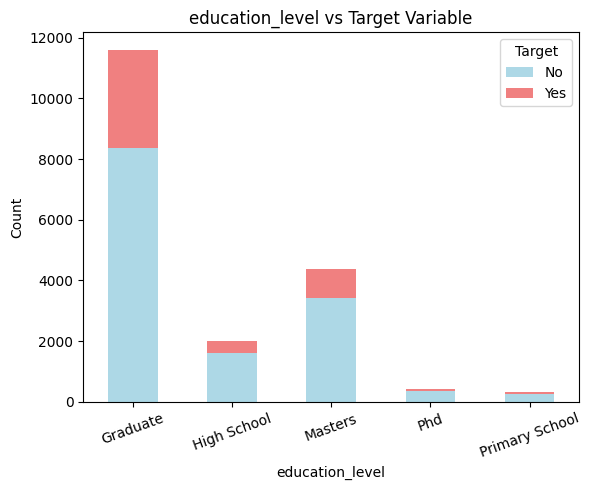

<Figure size 800x600 with 0 Axes>

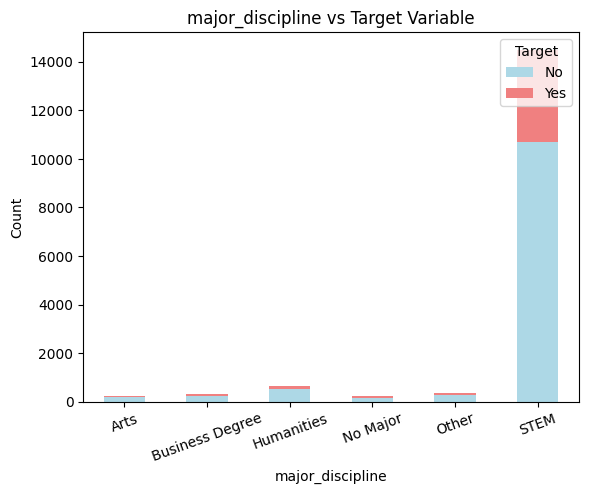

<Figure size 800x600 with 0 Axes>

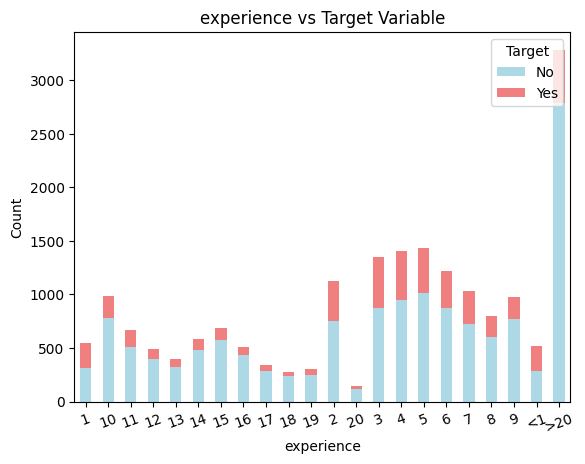

<Figure size 800x600 with 0 Axes>

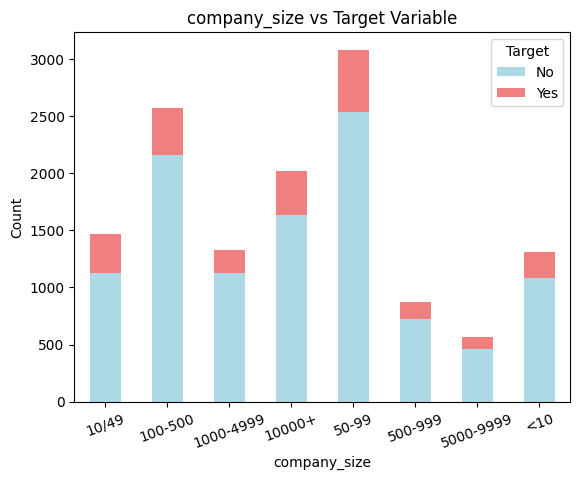

<Figure size 800x600 with 0 Axes>

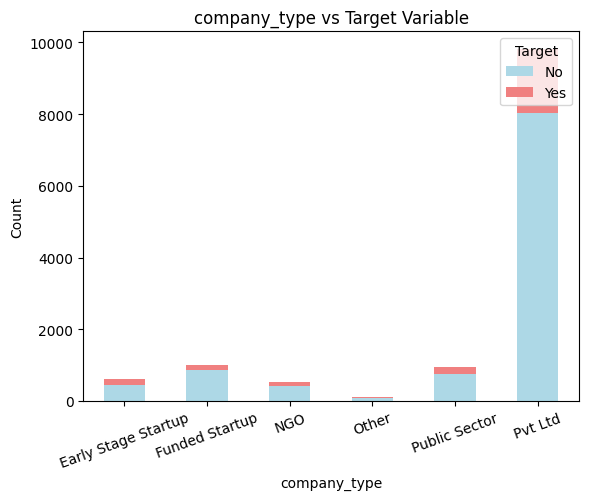

<Figure size 800x600 with 0 Axes>

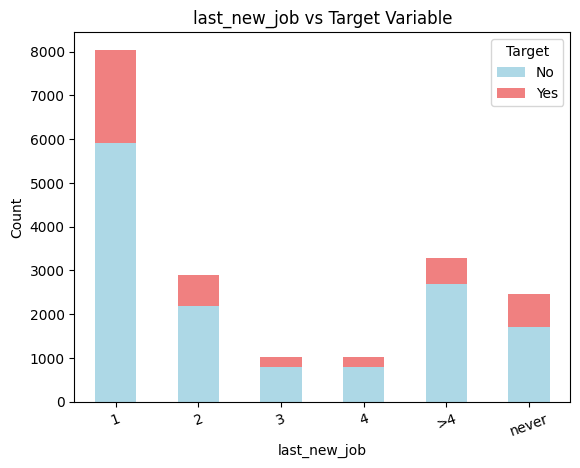

In [19]:
# Loop through each categorical column
for column in cats:
    plt.figure(figsize=(8, 6))

    # Create a DataFrame with count values for each category
    count_data = df.groupby([column, 'target']).size().unstack()

    # Plot the stacked bar plot using Matplotlib
    count_data.plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral'])

    plt.title(f'{column} vs Target Variable')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(['No', 'Yes'], title='Target', loc='upper right')
    plt.xticks(rotation=20)
    plt.show()

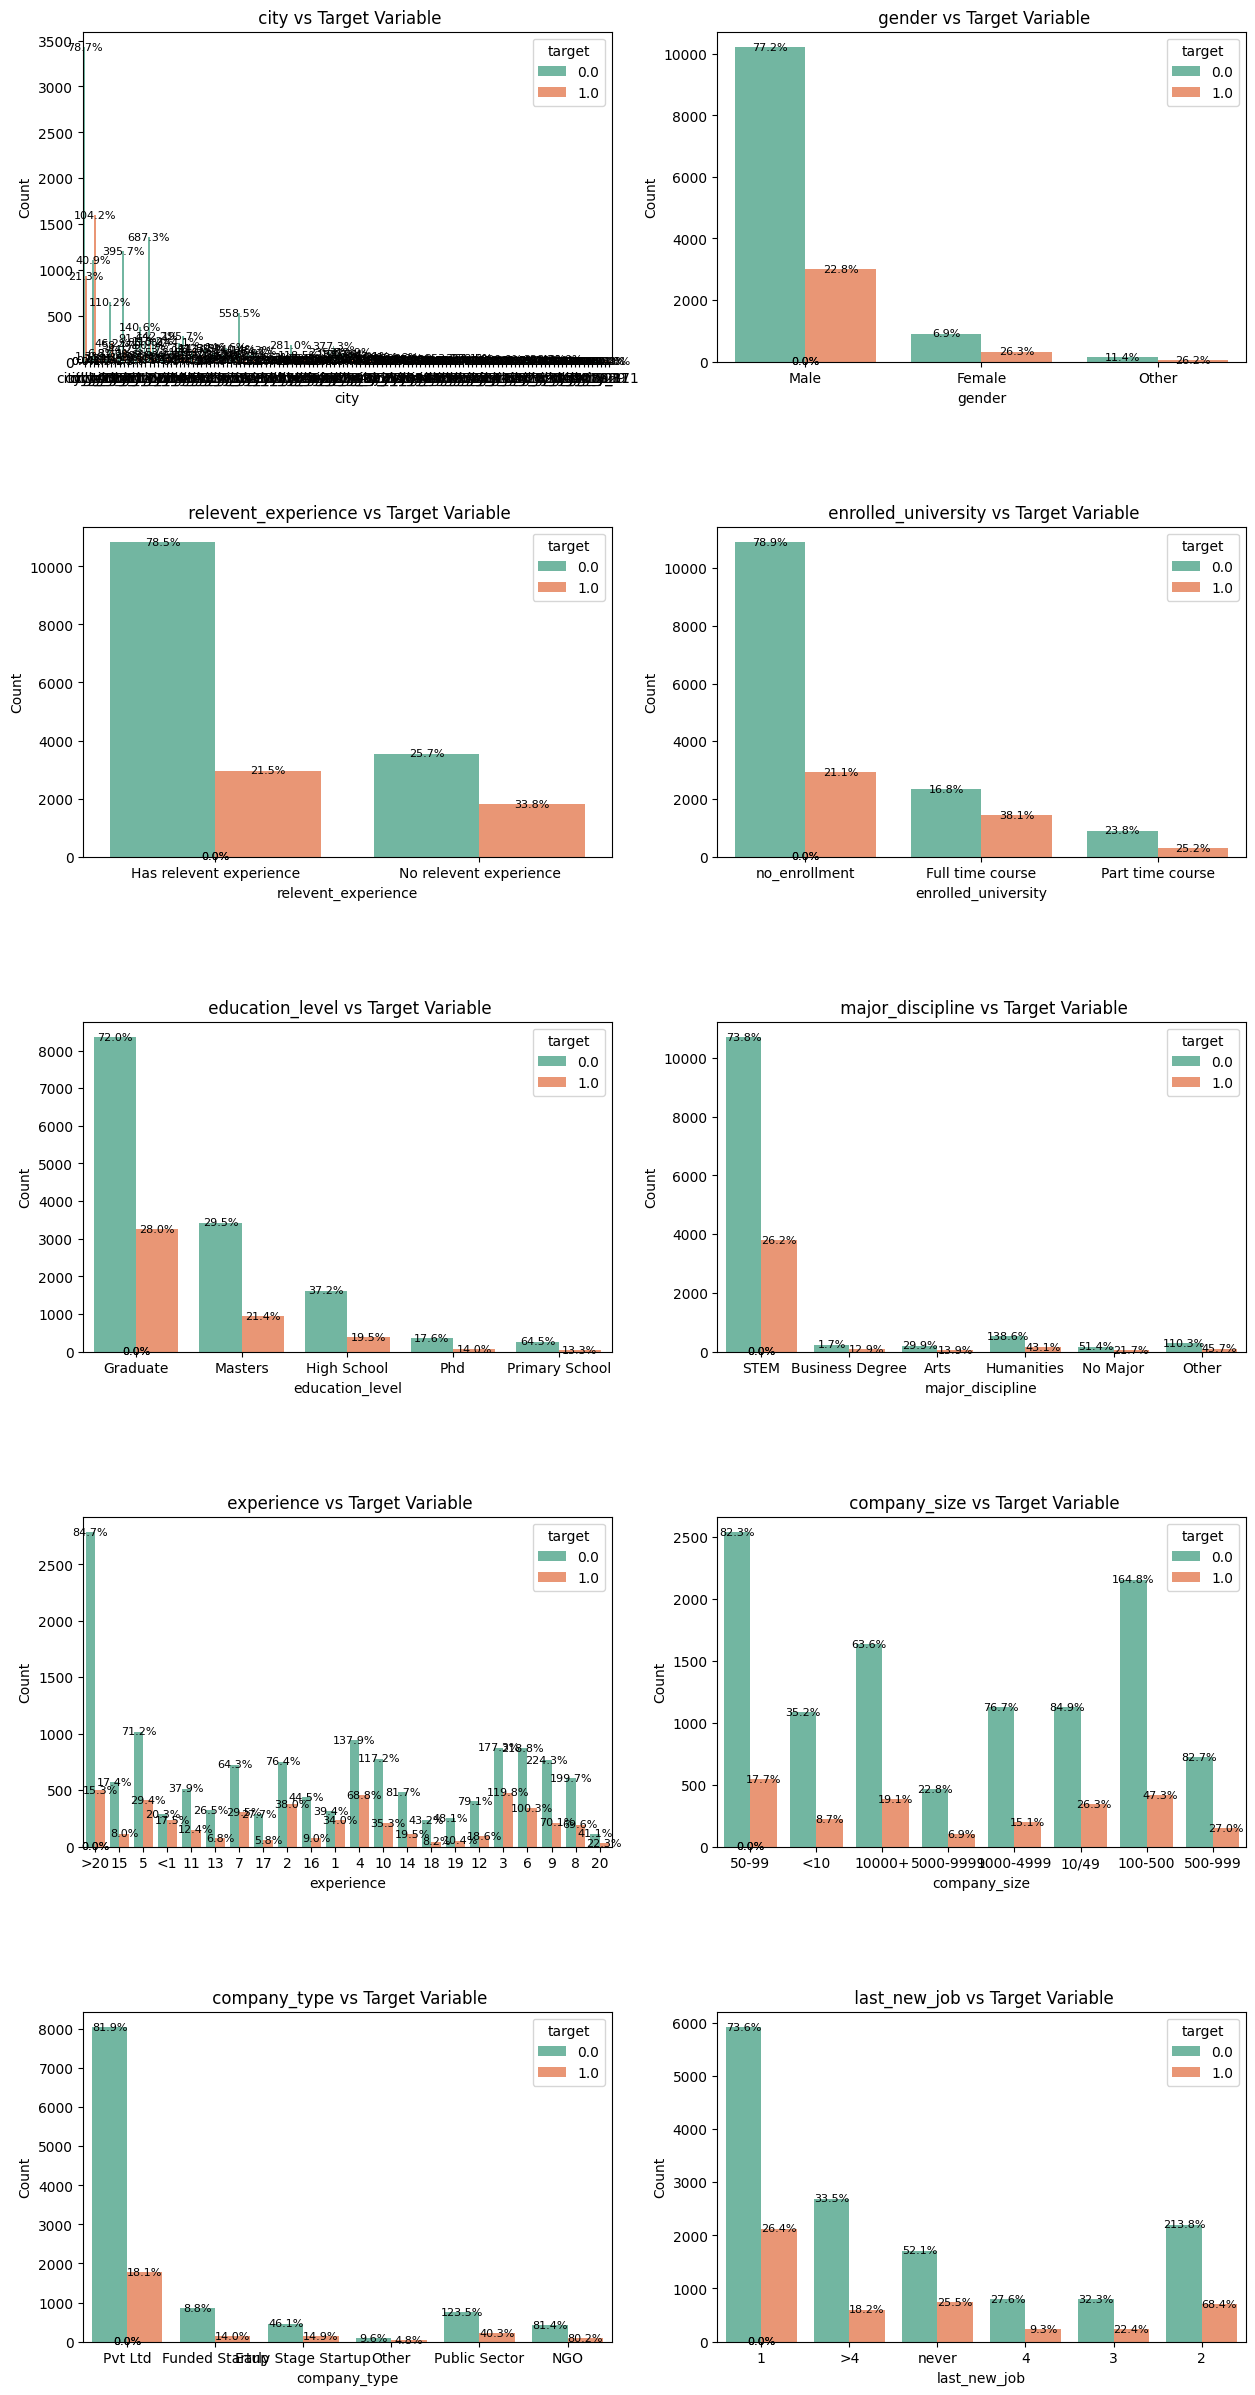

In [20]:
# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 30))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing

# Flatten the axes if there is only one row
axes = axes.flatten() if num_rows > 1 else [axes]

# Loop through each categorical column
for i, (column, ax) in enumerate(zip(cats, axes)):
    sns.countplot(x=column, hue='target', data=df, palette='Set2', ax=ax)

    # Add percentage labels on top of the bars
    total_counts = df[column].value_counts()
    # Add percentage labels on top of the bars
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height / total_counts[int(p.get_x())]:.1%}', (x + width / 2, height),
                ha='center', va='center', fontsize=8)

    ax.set_title(f' {column} vs Target Variable')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

plt.show()

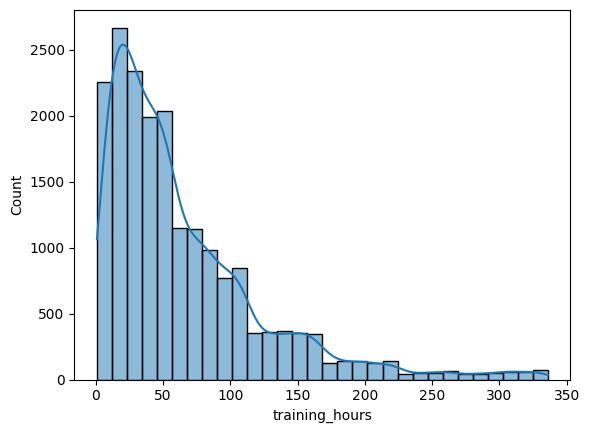

In [30]:
sns.histplot(train_df['training_hours'], bins=30, kde=True)
plt.show()

C:\Users\Nadya Novalina\AppData\Local\Temp\ipykernel_4456\523329329.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df.corr()


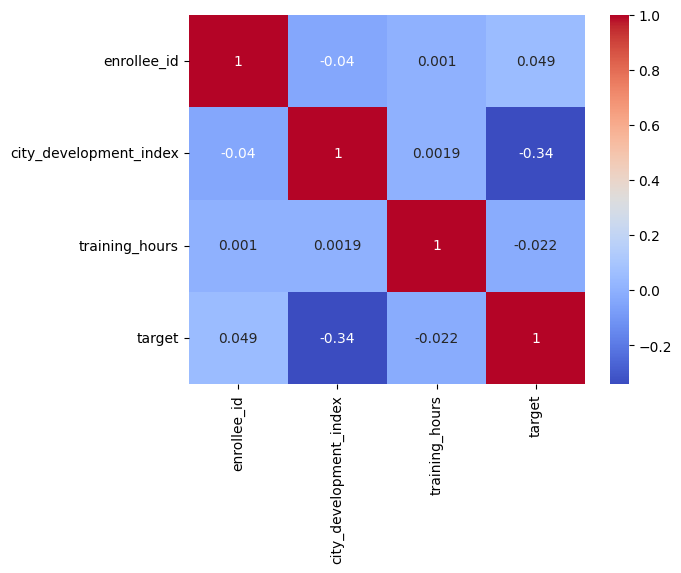

In [16]:
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()